# Exploring Variations in COVID-19 Case Fatality Rates Across Countries
##### Written by Tzu Yi, Huang (Department of Medicine, National Taiwan University, Taipei, Taiwan)
##### Correspond to b08401055@ntu.edu.tw
+ The case fatality rate (CFR) is an important prognosis indicator of an emerging disease, defined as total deaths/total cases.
+ CFR is often reported in the media for cross-country comparisons.
+ However, CFR varies spatiotemporally and the variations are not easily explained.
+ Here I collect data to annalyze what may correalte with COVID-19 case fatality rates.

### Collect and format data
+ import all the modules we need
+ write a function to map various indicators to each country
|data|source|
|----|:----|
|CFR |Our World in Data (https://ourworldindata.org/)|
|demography|Our World in Data (https://ourworldindata.org/)|
|HAQ|Our World in Data (https://ourworldindata.org/)|
|GDP|Our World in Data (https://ourworldindata.org/)|
|All DALYs rate|Global Burden of Disease Study 2019 (GBD 2019) Results http://ghdx.healthdata.org/gbd-results-tool.|


In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
CFR = pd.read_excel('CFR and HAQ.xlsx', sheet_name='CFR')

def formatData(cname, sname, map_val='country', value = 'val'):
    df = pd.read_excel('CFR and HAQ.xlsx', sheet_name=sname)
    pattern = re.compile("\s\(.*\)")
    df['country'] = df["country"].str.replace(pattern, '#').astype(str).str.strip('#')
    dataMap = dict(df[['country', value]].values)
    CFR[cname] = CFR[map_val].map(dataMap)
    
#basic country information 
formatData(sname='demography', cname='continent', value = 'continent')
formatData(sname='demography', cname='population', value = 'population')
formatData(sname='demography', cname='population density', value = 'population_density')
#demography and population structure
formatData(sname='demography', cname='median age', value = 'median_age')
formatData(sname='demography', cname='aged 65 older', value = 'aged_65_older')
formatData(sname='demography', cname='aged 70 older', value = 'aged_70_older')
#healthcare system and medical development
formatData(sname='demography', cname='life expectancy', value = 'life_expectancy')
formatData(sname='HAQ', cname='HAQ')
#disease burden of non-communicable disease
formatData(sname='COPD DALYs', cname='DALYs rate from COPD', map_val='official name')
formatData(sname='CVD DALYs', cname='DALYs rate from CVD', map_val='official name')
formatData(sname='diabetes DALYs', cname='DALYs rate from DM', map_val='official name')
#disease burden from S. pneumoniae
formatData(sname='Pneumo DALYs', cname='DALYs rate from PNEU', map_val='official name')
#disease bruden due to environmental exposure
formatData(sname='air pollution DALYs', cname='DALYs rate from air pollution', map_val='official name')
formatData(sname='tobacco DALYs', cname='DALYs rate from tobacco use', map_val='official name')
formatData(sname='low physical DALYs', cname='DALYs rate from low physical activity', map_val='official name')
#economy
formatData(sname='2018 GDP', cname='2018 GDP')
CFR.head()

,country,official name,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR,...,life expectancy,HAQ,DALYs rate from COPD,DALYs rate from CVD,DALYs rate from DM,DALYs rate from PNEU,DALYs rate from air pollution,DALYs rate from tobacco use,DALYs rate from low physical activity,2018 GDP
0,Afghanistan,Afghanistan,0.0357,0.0189,0.0366,0.0371,0.0409,0.0437,0.0440,0.0395,...,64.83,32.5,360.230585,4753.720830,660.642999,2149.513595,4830.953644,1635.230931,286.182376,6.759497e+10
1,Albania,Albania,0.0502,0.0221,0.0309,0.0269,0.0205,0.0167,0.0181,0.0185,...,78.57,78.2,462.964421,8133.500336,584.944651,249.198467,1771.284791,4267.505676,179.028940,3.400911e+10
2,Algeria,Algeria,0.1534,0.0709,0.0355,0.0341,0.0281,0.0265,0.0264,0.0268,...,76.88,63.7,354.269981,4907.464502,839.783813,250.260303,1564.623621,1897.730633,469.859695,5.903175e+11
3,Andorra,Andorra,0.0490,0.0609,0.0536,0.0175,0.0106,0.0101,0.0097,0.0092,...,83.73,94.6,862.147312,3145.011737,722.868903,135.605843,341.496534,3540.787845,260.386176,NaN
4,Angola,Angola,0.1053,0.0452,0.0462,0.0324,0.0231,0.0242,0.0232,0.0228,...,61.15,40.7,273.843761,2458.389560,602.691642,1553.607498,2388.742040,1086.826872,71.514568,1.759296e+11


### Clean data
+ find information -> how many non-null values do we have?
+ drop exception values

In [47]:
CFR.drop(CFR[CFR['2021/6/16 CFR']=='Jun 17, 2021\xa00.36%'].index, inplace=True)
CFR['2021/6/16 CFR'] = CFR['2021/6/16 CFR'].astype(float)
CFR.to_csv('CFR correlation input data.csv')
#CFR.to_excel('CFR correlation data.xlsx')

In [48]:
CFR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185 entries, 0 to 185
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                185 non-null    object 
 1   official name                          185 non-null    object 
 2   2020/4/16 CFR                          153 non-null    float64
 3   2020/6/16 CFR                          168 non-null    float64
 4   2020/8/16 CFR                          174 non-null    float64
 5   2020/10/16 CFR                         174 non-null    float64
 6   2020/12/16 CFR                         175 non-null    float64
 7   2021/2/16 CFR                          181 non-null    float64
 8   2021/4/16 CFR                          183 non-null    float64
 9   2021/6/16 CFR                          185 non-null    float64
 10  continent                              184 non-null    object 
 11  popula

### Data distribution
+ create a histogram for each indocator
+ We can see that the distribution patterns of CFR and most indicators are skewed to the right, rather than normal distribution.
+ Thus, it's more appropriate to use the nonparametric spearman correlation to analyze the monotonic relationship between CFR and these indicators.

array([[<AxesSubplot:title={'center':'2020/4/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/6/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/8/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/10/16 CFR'}>,
        <AxesSubplot:title={'center':'2020/12/16 CFR'}>],
       [<AxesSubplot:title={'center':'2021/2/16 CFR'}>,
        <AxesSubplot:title={'center':'2021/4/16 CFR'}>,
        <AxesSubplot:title={'center':'2021/6/16 CFR'}>,
        <AxesSubplot:title={'center':'population'}>,
        <AxesSubplot:title={'center':'population density'}>],
       [<AxesSubplot:title={'center':'median age'}>,
        <AxesSubplot:title={'center':'aged 70 older'}>,
        <AxesSubplot:title={'center':'life expectancy'}>,
        <AxesSubplot:title={'center':'HAQ'}>,
        <AxesSubplot:title={'center':'DALYs rate from COPD'}>],
       [<AxesSubplot:title={'center':'DALYs rate from CVD'}>,
        <AxesSubplot:title={'center':'DALYs rate from DM'}>,
        <AxesSubplot:title={'cente

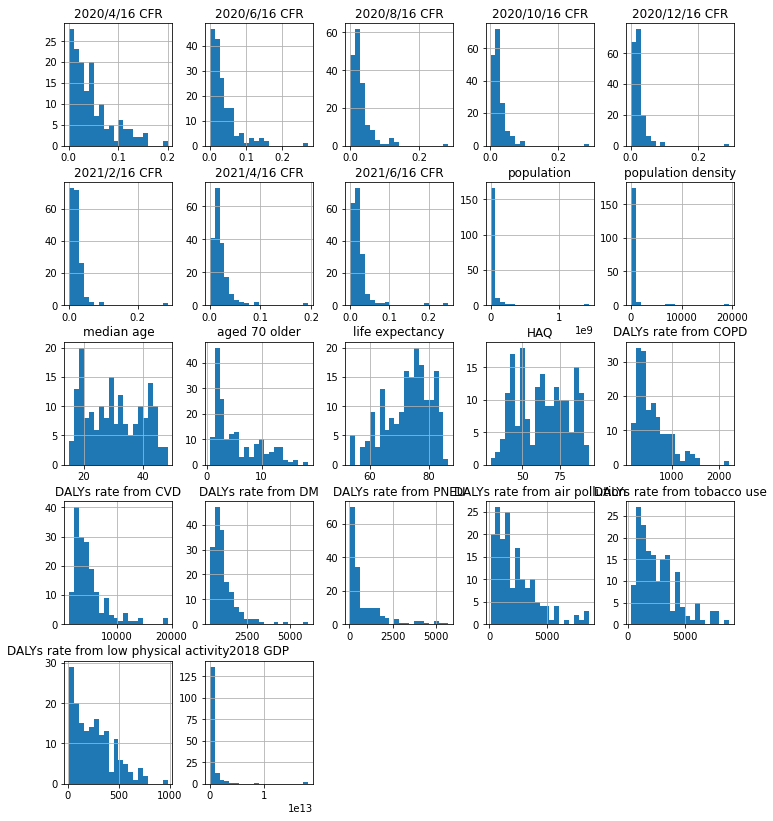

In [93]:
CFR.hist(bins=20, figsize=(12, 14))

+ Here I only use a part of the data for analysis.
+ Please feel free to try analyzing the rest of the data yourself.

In [96]:
CFR1 = CFR.dropna()
cor = CFR1.corr(method='spearman')
spear = cor.iloc[:8, 8:].drop(['population density', 'DALYs rate from air pollution',  'aged 70 older',                             
                            'DALYs rate from tobacco use','DALYs rate from low physical activity', 
                               'DALYs rate from PNEU'], axis=1).T
spear

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.297477,0.227087,0.255923,0.374466,0.346309,0.337819,0.311201,0.293249
median age,-0.146291,0.333192,0.180955,-0.044874,-0.109166,-0.046243,-0.058724,-0.065521
aged 65 older,0.000181,0.449340,0.304115,0.104450,0.026286,0.081656,0.065075,0.059397
life expectancy,-0.161142,0.261680,0.135941,-0.022388,-0.125747,-0.119155,-0.141114,-0.168935
HAQ,-0.206591,0.230808,0.107943,-0.085137,-0.178482,-0.136744,-0.159215,-0.186425
DALYs rate from COPD,0.071277,0.330043,0.233392,0.123783,0.031384,0.089576,0.066761,0.060343
DALYs rate from CVD,-0.044463,0.182262,0.090130,-0.054837,-0.023656,0.048285,0.060777,0.086665
DALYs rate from DM,-0.018772,0.072419,-0.046878,-0.061190,0.014155,0.052690,0.064220,0.083033
2018 GDP,0.055550,0.273457,0.207218,0.199445,0.118182,0.146262,0.113319,0.080291


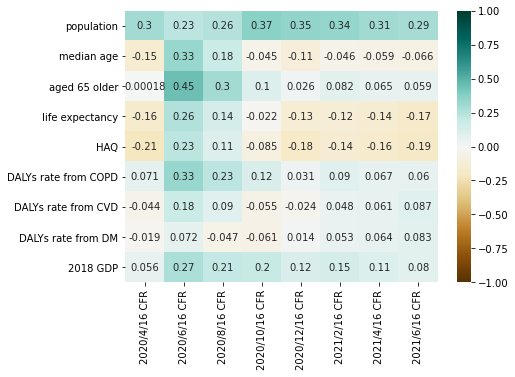

In [97]:
fig, ax = plt.subplots(figsize=(7,5))         # Sample figsize in inches

ax = sns.heatmap(spear, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [98]:
CFR1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133 entries, 0 to 185
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                133 non-null    object 
 1   official name                          133 non-null    object 
 2   2020/4/16 CFR                          133 non-null    float64
 3   2020/6/16 CFR                          133 non-null    float64
 4   2020/8/16 CFR                          133 non-null    float64
 5   2020/10/16 CFR                         133 non-null    float64
 6   2020/12/16 CFR                         133 non-null    float64
 7   2021/2/16 CFR                          133 non-null    float64
 8   2021/4/16 CFR                          133 non-null    float64
 9   2021/6/16 CFR                          133 non-null    float64
 10  continent                              133 non-null    object 
 11  popula

### Hypothesis test
+ null hypothesis: rho (spearman correlation coefficient) = 0 (there's no monotonic relationship between the two)
+ two-tailed student's t test (alpha = 0.05)
+ test statistics = abs(rho*np.sqrt((n-2)/(1-rho**2)))
+ calculate p-value and only ahow those <0.05

In [99]:
test_stat = abs(spear*np.sqrt((133-2)/(1-spear**2)))
test_stat

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,3.566230,2.668850,3.030082,4.622266,4.225140,4.108026,3.747965,3.510728
median age,1.692583,4.044670,2.105896,0.514122,1.256969,0.529837,0.673291,0.751542
aged 65 older,0.002073,5.756835,3.653814,1.202058,0.300959,0.937730,0.746398,0.681032
life expectancy,1.868771,3.103199,1.570499,0.256303,1.450756,1.373577,1.631449,1.961745
HAQ,2.416672,2.715029,1.242721,0.977984,2.076155,1.579948,1.845840,2.171804
DALYs rate from COPD,0.817881,4.001746,2.747159,1.427740,0.359387,1.029379,0.765821,0.691921
DALYs rate from CVD,0.509408,2.121615,1.035798,0.628580,0.270834,0.553289,0.696915,0.995671
DALYs rate from DM,0.214891,0.831055,0.537137,0.701667,0.162033,0.603898,0.736557,0.953648
2018 GDP,0.636786,3.253886,2.424345,2.329552,1.362197,1.692243,1.305399,0.921950


In [100]:
from scipy.stats import t
df = test_stat.copy()
df2 = df.copy()
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        df.iloc[i, j]= t.sf(df.iloc[i, j], 126)*2
        if df.iloc[i, j] <= 0.05:
            df2.iloc[i, j] = df.iloc[i, j]
        else:
            df2.iloc[i, j] = np.nan
df2

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.000513,8.612827e-03,0.002967,0.000009,0.000045,0.000071,0.00027,0.000621
median age,NaN,9.070934e-05,0.037198,NaN,NaN,NaN,NaN,NaN
aged 65 older,NaN,6.174135e-08,0.000378,NaN,NaN,NaN,NaN,NaN
life expectancy,NaN,2.363891e-03,NaN,NaN,NaN,NaN,NaN,NaN
HAQ,0.017096,7.556918e-03,NaN,NaN,0.039913,NaN,NaN,0.031743
DALYs rate from COPD,NaN,1.066047e-04,0.006893,NaN,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,3.582848e-02,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018 GDP,NaN,1.461615e-03,0.016755,0.021421,NaN,NaN,NaN,NaN


### Try grouping by GDP
+ Sometimes the monotonic relationship (correlation) may exist only among certain groups rather than among the whole dataset.
+ Thus, researchers often try to group the data into several groups to see if this would affect the outcome of the correlation analysis.

#### First, let's see those countries with the top 50% GDP.

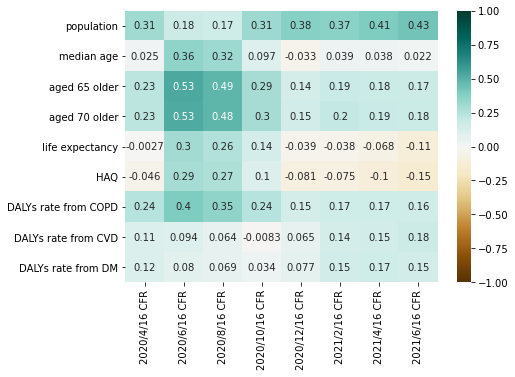

In [57]:
df_a = CFR1[CFR1['2018 GDP']>=CFR1['2018 GDP'].median()]
a = df_a.corr(method='spearman').iloc[:8, 8:].drop(['population density', 'DALYs rate from PNEU',
                                                     'DALYs rate from tobacco use','DALYs rate from air pollution',
                                                   'DALYs rate from low physical activity', '2018 GDP'], axis=1).T
fig, ax = plt.subplots(figsize=(7, 5))         # Sample figsize in inches

ax = sns.heatmap(a, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [26]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 2 to 181
Data columns (total 25 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   country                                67 non-null     object 
 1   official name                          67 non-null     object 
 2   2020/4/16 CFR                          67 non-null     float64
 3   2020/6/16 CFR                          67 non-null     float64
 4   2020/8/16 CFR                          67 non-null     float64
 5   2020/10/16 CFR                         67 non-null     float64
 6   2020/12/16 CFR                         67 non-null     float64
 7   2021/2/16 CFR                          67 non-null     float64
 8   2021/4/16 CFR                          67 non-null     float64
 9   2021/6/16 CFR                          67 non-null     float64
 10  continent                              67 non-null     object 
 11  populat

In [58]:
def hypo_test(spear, n):
    df = abs(spear*np.sqrt((n-2)/(1-spear**2)))
    df2 = df.copy()
    for i in range(df.shape[0]):
        for j in range(df.shape[1]):
            df.iloc[i, j]= t.sf(df.iloc[i, j], (n-2))*2
            if df.iloc[i, j] <= 0.05:
                df2.iloc[i, j] = df.iloc[i, j]
            else:
                df2.iloc[i, j] = np.nan
    return df2
hypo_test(a, 67)

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.010245,NaN,NaN,0.009514,0.001585,0.002143,0.00067,0.000265
median age,NaN,0.002965,0.009334,NaN,NaN,NaN,NaN,NaN
aged 65 older,NaN,0.000003,0.000029,0.015911,NaN,NaN,NaN,NaN
aged 70 older,NaN,0.000004,0.000032,0.014878,NaN,NaN,NaN,NaN
life expectancy,NaN,0.012547,0.033497,NaN,NaN,NaN,NaN,NaN
HAQ,NaN,0.015747,0.028212,NaN,NaN,NaN,NaN,NaN
DALYs rate from COPD,0.046695,0.000754,0.003528,0.048222,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### What about those that have the least 50% GDP?

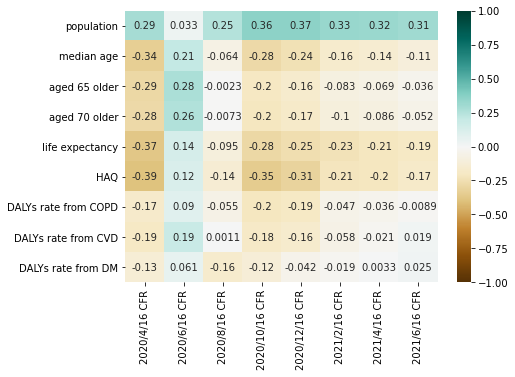

In [59]:
df_b = CFR1[CFR1['2018 GDP']<CFR1['2018 GDP'].median()]
b = df_b.corr(method='spearman').iloc[:8, 8:].drop(['population density', 'DALYs rate from PNEU',
                                                     'DALYs rate from tobacco use','DALYs rate from air pollution',
                                                   'DALYs rate from low physical activity', '2018 GDP'], axis=1).T
fig, ax = plt.subplots(figsize=(7, 5))         # Sample figsize in inches

ax = sns.heatmap(b, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [61]:
hypo_test(b, df_b.shape[0])

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.016529,NaN,0.040385,0.002719,0.002486,0.006139,0.00827,0.012542
median age,0.005863,NaN,NaN,0.023608,NaN,NaN,NaN,NaN
aged 65 older,0.020365,0.023041,NaN,NaN,NaN,NaN,NaN,NaN
aged 70 older,0.022931,0.036392,NaN,NaN,NaN,NaN,NaN,NaN
life expectancy,0.002037,NaN,NaN,0.021514,0.039365,NaN,NaN,NaN
HAQ,0.001100,NaN,NaN,0.004043,0.012270,NaN,NaN,NaN
DALYs rate from COPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Aging society
+ 65 older > 7% of population

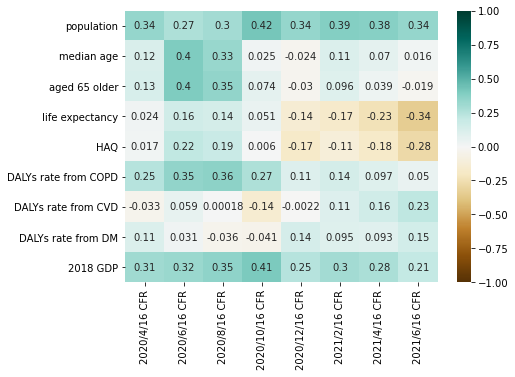

In [93]:
df_c = CFR1[CFR1['aged 65 older']>=7]
c = df_c.corr(method='spearman').iloc[:8, 8:].drop(['population density', 'aged 70 older',
                                                     'DALYs rate from low physical activity', 'DALYs rate from PNEU',
                                                     'DALYs rate from tobacco use','DALYs rate from air pollution'], axis=1).T
fig, ax = plt.subplots(figsize=(7, 5))         # Sample figsize in inches

ax = sns.heatmap(c, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [94]:
hypo_test(c, df_c.shape[0])

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,0.003982,0.023434,0.010943,0.000293,0.004052,0.001044,0.001283,0.004321
median age,NaN,0.000616,0.005293,NaN,NaN,NaN,NaN,NaN
aged 65 older,NaN,0.000571,0.003309,NaN,NaN,NaN,NaN,NaN
life expectancy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004545
HAQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020102
DALYs rate from COPD,0.042050,0.003350,0.002330,0.026560,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018 GDP,0.010221,0.006923,0.002839,0.000446,0.041667,0.011618,0.021800,NaN


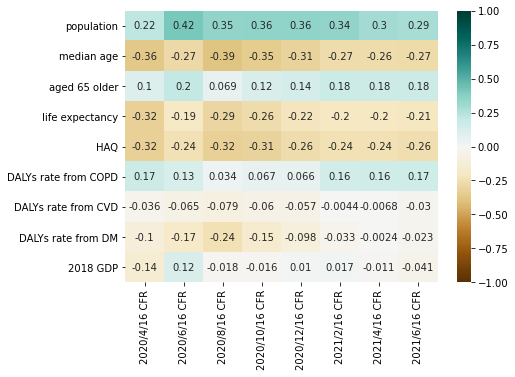

In [86]:
df_d = CFR1[CFR1['aged 65 older']<7]
d = df_d.corr(method='spearman').iloc[:8, 8:].drop(['population density', 'aged 70 older',
                                                     'DALYs rate from low physical activity', 'DALYs rate from PNEU',
                                                     'DALYs rate from tobacco use','DALYs rate from air pollution'], axis=1).T
fig, ax = plt.subplots(figsize=(7, 5))         # Sample figsize in inches

ax = sns.heatmap(d, cmap='BrBG', vmin=-1.0, vmax=1.0, annot=True)

In [87]:
hypo_test(d,df_d.shape[0])

,2020/4/16 CFR,2020/6/16 CFR,2020/8/16 CFR,2020/10/16 CFR,2020/12/16 CFR,2021/2/16 CFR,2021/4/16 CFR,2021/6/16 CFR
population,NaN,0.000572,0.005037,0.003951,0.003616,0.005262,0.015618,0.022197
median age,0.003186,0.028211,0.001606,0.004803,0.012356,0.034146,0.038555,0.032184
aged 65 older,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
life expectancy,0.009531,NaN,0.019572,0.037965,NaN,NaN,NaN,NaN
HAQ,0.008813,NaN,0.008949,0.012834,0.036335,NaN,NaN,0.040076
DALYs rate from COPD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from CVD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DALYs rate from DM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018 GDP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
